In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
btc_sentiment = pd.read_csv('fear_greed_index_raw.csv')
trader_data = pd.read_csv('historical_data_raw.csv')

btc_sentiment.shape
trader_data.shape

(211224, 16)

In [ ]:
btc_sentiment['date'] = pd.to_datetime(btc_sentiment['date'], format ='%d-%m-%Y')
btc_sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_data['Date'] = trader_data['Timestamp IST'].dt.date
trader_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [ ]:
trader_data = trader_data.dropna(subset=['Execution Price', 'Size Tokens', 'Side', 'Closed PnL'])

In [ ]:
trader_data['Side'] = trader_data['Side'].str.lower()

In [ ]:
# Feature Engineering for trader behavior

# Calculate absolute volume (size * execution price)
trader_data['volume'] = trader_data['Size Tokens'].abs() * trader_data['Execution Price']

In [ ]:
# Define profitability: positive closedPnL means profitable trades
trader_data['profitable'] = trader_data['Closed PnL'] > 0
trader_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,volume,profitable
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,buy,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,7872.163303,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,buy,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,127.680000,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,buy,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1150.630695,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,buy,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1142.038452,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,buy,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,69.747462,False


In [ ]:
# Aggregate daily metrics to see behavior patterns per day
daily_behavior = trader_data.groupby('Date').agg(
    total_trades=('Account', 'count'),
    total_volume=('volume', 'sum'),
    win_rate=('profitable', 'mean'),   # ratio of profitable trades
    avg_closedPnL=('Closed PnL', 'mean'),
    avg_size=('Size Tokens', 'mean'),
    avg_execution_price=('Execution Price', 'mean'),
).reset_index()

In [ ]:
# Rename the date column in btc_sentiment to match daily_behavior
btc_sentiment = btc_sentiment.rename(columns={'date': 'Date'})

# Merge with market sentiment data on Date
analysis_df = pd.merge(daily_behavior, btc_sentiment, on='Date', how='inner')

In [ ]:
# Encode sentiment classification to numeric for correlation (Fear=0, Greed=1)
analysis_df['sentiment_num'] = analysis_df['classification'].map({'Fear': 0, 'Greed': 1, 'Neutral': 0.5, 'Extreme Fear': 0, 'Extreme Greed': 1})

In [ ]:
# Correlation analysis
corr_matrix = analysis_df[['sentiment_num', 'total_trades', 'total_volume', 'win_rate', 'avg_closedPnL']].corr()
print("Correlation matrix:")
print(corr_matrix['sentiment_num'].sort_values(ascending=False))

Correlation matrix:
sentiment_num    1.000000
win_rate         0.094925
avg_closedPnL    0.026515
total_trades    -0.256068
total_volume    -0.276344
Name: sentiment_num, dtype: float64


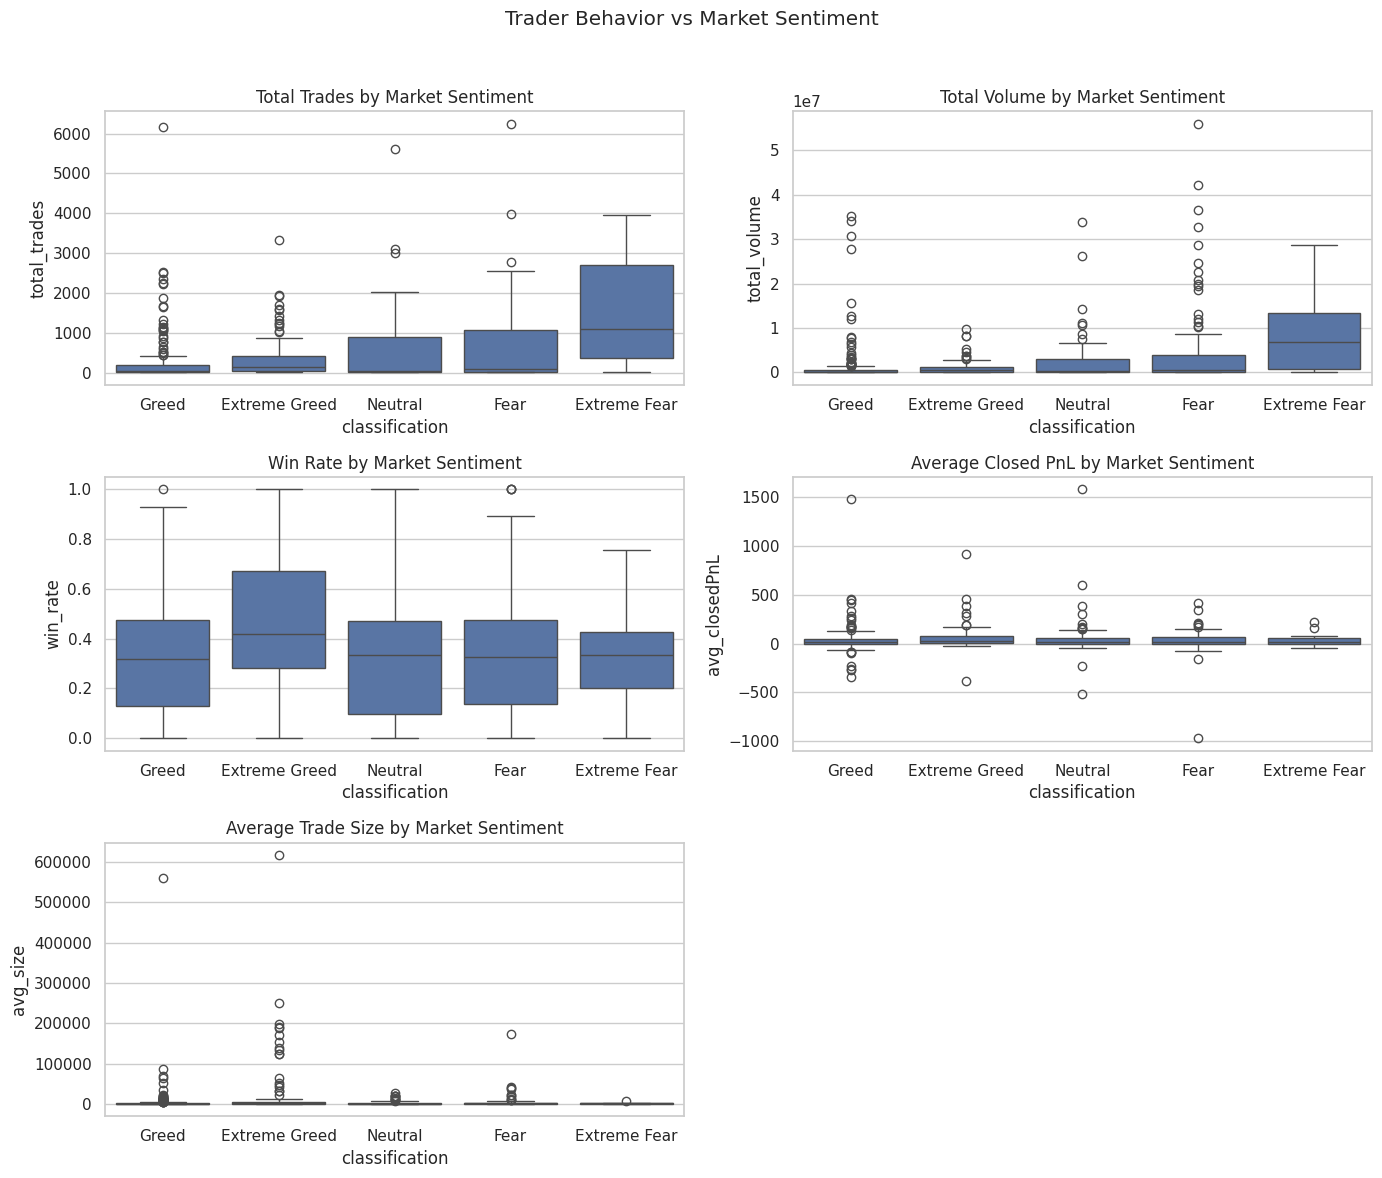

In [ ]:
# Visualization of relationship between sentiment and key trader behavior metrics

sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Trader Behavior vs Market Sentiment')

# Total trades vs sentiment
sns.boxplot(x='classification', y='total_trades', data=analysis_df, ax=axes[0, 0])
axes[0, 0].set_title('Total Trades by Market Sentiment')

# Total volume vs sentiment
sns.boxplot(x='classification', y='total_volume', data=analysis_df, ax=axes[0, 1])
axes[0, 1].set_title('Total Volume by Market Sentiment')

# Win rate vs sentiment
sns.boxplot(x='classification', y='win_rate', data=analysis_df, ax=axes[1, 0])
axes[1, 0].set_title('Win Rate by Market Sentiment')

# Average closedPnL vs sentiment
sns.boxplot(x='classification', y='avg_closedPnL', data=analysis_df, ax=axes[1, 1])
axes[1, 1].set_title('Average Closed PnL by Market Sentiment')

# Average trade size vs sentiment
sns.boxplot(x='classification', y='avg_size', data=analysis_df, ax=axes[2, 0])
axes[2, 0].set_title('Average Trade Size by Market Sentiment')

# Hide the last empty subplot
axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

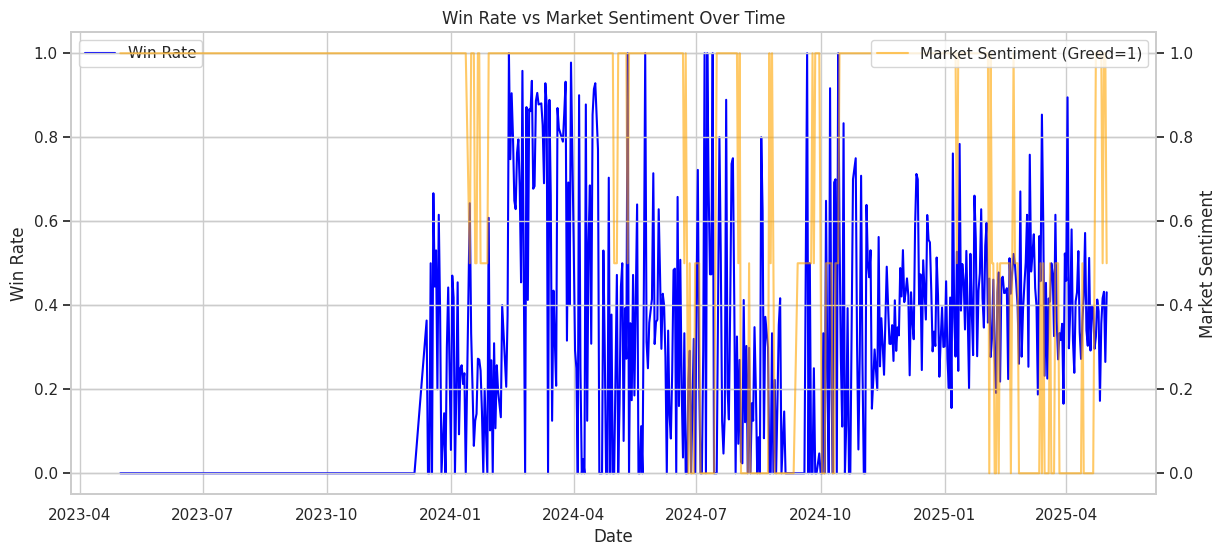

Summary Insights:
- Check correlation coefficients to see which trader metrics are most aligned or diverged with sentiment.
- Visualizations reveal distributions and potential differences in trader behavior under Fear vs Greed.
- Time series plots can highlight lagging or leading relationships.


In [ ]:
# Additional analysis: time series plots to observe trends over time
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(analysis_df['Date'], analysis_df['win_rate'], label='Win Rate', color='blue')
ax2 = ax1.twinx()
ax2.plot(analysis_df['Date'], analysis_df['sentiment_num'], label='Market Sentiment (Greed=1)', color='orange', alpha=0.6)

ax1.set_xlabel('Date')
ax1.set_ylabel('Win Rate')
ax2.set_ylabel('Market Sentiment')
plt.title('Win Rate vs Market Sentiment Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# Summary insights
print("Summary Insights:")
print("- Check correlation coefficients to see which trader metrics are most aligned or diverged with sentiment.")
print("- Visualizations reveal distributions and potential differences in trader behavior under Fear vs Greed.")
print("- Time series plots can highlight lagging or leading relationships.")

# Save the analysis dataframe for further modeling or reporting
analysis_df.to_csv('trader_behavior_sentiment_analysis.csv', index=False)